In [5]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.stats.multitest as smm
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib style for reproducible, publication-ready figures
sns.set(style="whitegrid", context="notebook", font_scale=1.1)
plt.rcParams['figure.figsize'] = (8, 6)

In [6]:
def find_data_dir(start_path=Path.cwd()):
    """Search current directory and parents for a 'data' folder. Return Path or raise FileNotFoundError."""
    p = start_path.resolve()
    if (p / 'data').is_dir():
        return (p / 'data')
    for parent in p.parents:
        if (parent / 'data').is_dir():
            return (parent / 'data')
    raise FileNotFoundError('Could not find a data/ directory in current directory or parents.')

data_dir = find_data_dir()
print('Using data directory:', data_dir)
print('Files found:', list(data_dir.glob('*')))

Using data directory: C:\Users\pable\OneDrive\Escritorio\UPF\BCO\Group Project\data
Files found: [WindowsPath('C:/Users/pable/OneDrive/Escritorio/UPF/BCO/Group Project/data/Analysis-results-1_Gitools.heatmap.zip'), WindowsPath('C:/Users/pable/OneDrive/Escritorio/UPF/BCO/Group Project/data/Analysis-results-1_Gitools.heatmap.zip2980040899148126711tmp'), WindowsPath('C:/Users/pable/OneDrive/Escritorio/UPF/BCO/Group Project/data/BREAST_sample_muts.hg38.txt'), WindowsPath('C:/Users/pable/OneDrive/Escritorio/UPF/BCO/Group Project/data/diffexpr_No_vs_Yes.txt'), WindowsPath('C:/Users/pable/OneDrive/Escritorio/UPF/BCO/Group Project/data/expression_dataclean.txt'), WindowsPath('C:/Users/pable/OneDrive/Escritorio/UPF/BCO/Group Project/data/expression_matrix.txt'), WindowsPath('C:/Users/pable/OneDrive/Escritorio/UPF/BCO/Group Project/data/PIK3CA_Gitools.txt'), WindowsPath('C:/Users/pable/OneDrive/Escritorio/UPF/BCO/Group Project/data/PIK3CA_mutated_Group_Comparison-results-1-data.txt'), WindowsPat

In [7]:
import numpy as np
import pandas as pd

expr_path = data_dir / 'expression_matrix.txt'

# Load the expression matrix
expr = pd.read_csv(expr_path, sep='\t', index_col=0)
print('Original shape:', expr.shape)

# 1️⃣ Replace "-" (or any other non-numeric strings) with NaN
expr.replace("-", np.nan, inplace=True)

# 2️⃣ Convert all values to float (forces numeric conversion)
#expr = expr.apply(pd.to_numeric, errors='coerce')

# 3️⃣ Optional: remove genes or samples that are completely missing
#expr.dropna(axis=0, how='all', inplace=True)  # drop genes with all NaN
#expr.dropna(axis=1, how='all', inplace=True)  # drop samples with all NaN

# 4️⃣ Quick summary
print('Cleaned expression matrix shape:', expr.shape)
print('Number of missing values:', expr.isna().sum().sum())

# 5️⃣ Optional: fill remaining NaNs with something if needed
# e.g., expr.fillna(0, inplace=True)  # or expr.fillna(expr.mean(), inplace=True)

display(expr.head())

# Define output path
clean_expr_path = data_dir / 'expression_dataclean.txt'

# Save the cleaned expression matrix
expr.to_csv(clean_expr_path, sep='\t', index=True)

print(f'Cleaned expression matrix saved to: {clean_expr_path}')


Original shape: (20380, 889)
Cleaned expression matrix shape: (20380, 889)
Number of missing values: 386435


,TCGA-A1-A0SB,TCGA-A1-A0SD,TCGA-A1-A0SE,TCGA-A1-A0SF,TCGA-A1-A0SG,TCGA-A1-A0SH,TCGA-A1-A0SI,TCGA-A1-A0SJ,TCGA-A1-A0SK,TCGA-A1-A0SM,...,TCGA-GM-A2DH,TCGA-GM-A2DI,TCGA-GM-A2DK,TCGA-GM-A2DL,TCGA-GM-A2DM,TCGA-GM-A2DN,TCGA-GM-A2DO,TCGA-GM-A3NW,TCGA-GM-A3NY,TCGA-HN-A2NL
GeneID,,,,,,,,,,,,,,,,,,,,,
A1BG,-1.3149994999999999,0.21500049999999993,0.6549995,1.4149995,0.46500049999999993,0.5550004999999998,0.0749995,0.8950004999999999,-0.49499950000000004,1.3249995,...,-0.39499950000000006,0.10500049999999994,1.2250005,0.9049995,0.11499949999999992,-0.0450005,0.9049995,0,2.4650005,0.11499949999999992
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2BP1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2LD1,-1.06,-0.24000000000000002,-0.15,1.03,0.55,0.73,-0.5800000000000001,0.73,2.3600000000000003,0.38,...,-0.12999999999999998,-0.32000000000000006,-0.33000000000000007,-0.4,0.04999999999999999,0.18,1.04,0,0.18,0.86
A2M,1.5050000000000001,1.095,0.49499999999999994,0.48500000000000004,0.16499999999999998,0.325,-0.185,0.9850000000000001,-1.415,-0.315,...,-0.515,0.685,0.585,0.175,-0.655,0.425,-1.105,0,-0.405,-1.125


Cleaned expression matrix saved to: C:\Users\pable\OneDrive\Escritorio\UPF\BCO\Group Project\data\expression_dataclean.txt


In [8]:
# Paths to expected files (these names come from the assignment)
expr_path = data_dir / 'expression_dataclean.txt'
annot_path = data_dir / 'PIK3CA_mutation_status.txt'
gene_annot_path = data_dir / 'affy2gene.txt'

# Load expression matrix
if not expr_path.exists():
    raise FileNotFoundError(f'Expression file not found: {expr_path}')
expr = pd.read_csv(expr_path, sep='	', index_col=0)
print('Expression matrix shape (genes x samples):', expr.shape)

# Load annotations
if not annot_path.exists():
    raise FileNotFoundError(f'Annotations file not found: {annot_path}')
ann = pd.read_csv(annot_path, sep='	', index_col=None)
print('Annotations shape:', ann.shape)

# Load gene annotation if present (optional)
gene_annot = None
if gene_annot_path.exists():
    try:
        gene_annot = pd.read_csv(gene_annot_path, sep='	', index_col=None)
        print('Loaded gene annotation, shape:', gene_annot.shape)
    except Exception as e:
        print('Could not read affy2gene.txt:', e)

# Quick peek
display(expr.iloc[:5, :5])
display(ann.head())

Expression matrix shape (genes x samples): (20380, 889)
Annotations shape: (843, 2)


,TCGA-A1-A0SB,TCGA-A1-A0SD,TCGA-A1-A0SE,TCGA-A1-A0SF,TCGA-A1-A0SG
GeneID,,,,,
A1BG,-1.315,0.215,0.654999,1.414999,0.465
A1CF,0.000,0.000,0.000000,0.000000,0.000
A2BP1,0.000,0.000,0.000000,0.000000,0.000
A2LD1,-1.060,-0.240,-0.150000,1.030000,0.550
A2M,1.505,1.095,0.495000,0.485000,0.165


,SampleID,PIK3CA_mutated
0,TCGA-A1-A0SB,No
1,TCGA-A1-A0SD,No
2,TCGA-A1-A0SE,No
3,TCGA-A1-A0SF,No
4,TCGA-A1-A0SG,No


In [9]:
# Heuristic: find a column in annotations that matches sample names or looks like a 'group' column.
# First, make sure annotation sample IDs match expression column names.
# Try common patterns: a 'sample' column, or first column being sample IDs.
ann_cols = list(ann.columns)
print('Annotation columns:', ann_cols)

# Try to find a sample id column that matches expression columns
sample_col = None
for c in ann_cols:
    # if many values in this column match expression columns, use it as sample id
    matches = ann[c].astype(str).isin(expr.columns.astype(str)).sum()
    if matches >= max(1, len(expr.columns) // 4):  # heuristic threshold
        sample_col = c
        break
# fallback: use first column as sample id
if sample_col is None:
    sample_col = ann_cols[0]
    print(f'No clear sample-id column detected; using first column: {sample_col}')
else:
    print('Using sample id column:', sample_col)

ann = ann.copy()
ann['.sample_id_for_join'] = ann[sample_col].astype(str)

# Find a group column: look for a column with <= 20 unique values and not numeric
group_col = None
for c in ann_cols:
    if c == sample_col:
        continue
    nunique = ann[c].nunique(dropna=True)
    if 1 < nunique <= 20 and not pd.api.types.is_numeric_dtype(ann[c]):
        group_col = c
        break
# fallback: pick the second column or anything that is not sample_col
if group_col is None and len(ann_cols) > 1:
    group_col = [c for c in ann_cols if c != sample_col][0]

print('Using group column:', group_col)

# Create a simple mapping from sample id -> group and align to expression columns
mapping = ann.set_index('.sample_id_for_join')[group_col].astype(str).to_dict()
# Build a group Series indexed by expression columns
sample_groups = pd.Series([mapping.get(str(s), np.nan) for s in expr.columns], index=expr.columns)
print('Number of samples with known group:', sample_groups.notna().sum(), '/', len(sample_groups))
display(sample_groups.value_counts(dropna=False))

# Drop samples without a group label
valid_samples = sample_groups.dropna().index.tolist()
expr = expr[valid_samples]
sample_groups = sample_groups.loc[valid_samples]

# Choose two groups for comparison
unique_groups = sorted(sample_groups.unique())
if len(unique_groups) < 2:
    raise ValueError('Less than two groups found in annotations; cannot perform comparison')
group_a, group_b = unique_groups[0], unique_groups[1]
print(f'Comparing groups: {group_a} (reference) vs {group_b} (case)')

# Build boolean masks
samples_a = sample_groups[sample_groups == group_a].index.tolist()
samples_b = sample_groups[sample_groups == group_b].index.tolist()
print('n samples in group A:', len(samples_a), 'n samples in group B:', len(samples_b))

Annotation columns: ['SampleID', 'PIK3CA_mutated']
Using sample id column: SampleID
Using group column: PIK3CA_mutated
Number of samples with known group: 843 / 889


No     599
Yes    244
NaN     46
dtype: int64

Comparing groups: No (reference) vs Yes (case)
n samples in group A: 599 n samples in group B: 244


In [10]:
def per_gene_tests(expr_df, samples_a, samples_b):
    genes = expr_df.index
    rows = []
    # iterate over genes (vectorized approaches also possible but this is explicit and easy to follow)
    for g in genes:
        x = expr_df.loc[g, samples_a].dropna().values.astype(float)
        y = expr_df.loc[g, samples_b].dropna().values.astype(float)
        mean_a = np.mean(x) if len(x) > 0 else np.nan
        mean_b = np.mean(y) if len(y) > 0 else np.nan
        # difference of means (interpretable as log2 fold-change if data are log2)
        log2fc = mean_b - mean_a
        # t-test (Welch's t-test)
        try:
            t_stat, p_t = stats.ttest_ind(y, x, equal_var=False, nan_policy='omit')
        except Exception:
            p_t = np.nan
        # Mann-Whitney U test (non-parametric). Note: requires at least one observation in each group
        try:
            # use two-sided test; if all values identical or small samples, this may raise or return a warning
            u_stat, p_mw = stats.mannwhitneyu(y, x, alternative='two-sided')
        except Exception:
            p_mw = np.nan
        rows.append((g, mean_a, mean_b, log2fc, p_t, p_mw))
    res = pd.DataFrame(rows, columns=[
        'gene', 'mean_A', 'mean_B', 'log2FC', 'p_ttest', 'p_mannwhitney'
    ]).set_index('gene')
    # Adjust p-values (FDR) separately for each test
    for col in ['p_ttest', 'p_mannwhitney']:
        pvals = res[col].values
        mask = ~pd.isna(pvals)
        adj = np.full_like(pvals, np.nan, dtype=float)
        if mask.sum() > 0:
            _, adj_p, _, _ = smm.multipletests(pvals[mask], alpha=0.05, method='fdr_bh')
            adj[mask] = adj_p
        res[col + '_fdr'] = adj
    return res

res = per_gene_tests(expr, samples_a, samples_b)
res = res.sort_values('p_ttest')
res.head()

C:\Users\pable\AppData\Local\Temp\ipykernel_1468\4164356433.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_t = stats.ttest_ind(y, x, equal_var=False, nan_policy='omit')
c:\Users\pable\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1253: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\pable\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1253: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\pable\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1253: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Use

,mean_A,mean_B,log2FC,p_ttest,p_mannwhitney,p_ttest_fdr,p_mannwhitney_fdr
gene,,,,,,,
NAT1,-1.096836,0.938156,2.034992,2.420614e-26,1.056995e-22,1.947384e-22,1.065926e-18
NASP,-1.096836,0.938156,2.034992,2.420614e-26,1.056995e-22,1.947384e-22,1.065926e-18
TSPAN15,-0.407164,0.279062,0.686227,4.665583e-25,4.317707e-20,2.502308e-21,1.741677e-16
DEGS2,-1.024456,0.388755,1.413211,1.141645e-23,1.460253e-15,4.592268e-20,8.924803e-13
REEP6,-0.944324,0.373730,1.318053,1.647054e-23,2.021788e-17,5.300219e-20,2.787575e-14


In [11]:
out_dir = Path.cwd().parents[0] / 'results' if (Path.cwd().parents[0] / 'results').exists() else (Path.cwd() / '..' / '..' / 'results')
# robustly try to create results under the workspace root 'results' if present, else in notebook dir ../results
out_dir = Path(out_dir).resolve()
out_dir.mkdir(parents=True, exist_ok=True)
out_path = out_dir / f'diffexpr_{group_a}_vs_{group_b}.tsv'
res.to_csv(out_path, sep='	')
print('Results saved to', out_path)

# Quick summaries
print('Number of genes tested:', res.shape[0])
print('Significant genes (t-test FDR < 0.05):', (res['p_ttest_fdr'] < 0.05).sum())
print('Significant genes (Mann-Whitney FDR < 0.05):', (res['p_mannwhitney_fdr'] < 0.05).sum())
# Significant genes with FDR < 0.05 and |log2FC| >= 1
res_sig = res[(res['p_ttest_fdr'] < 0.05) & (res['log2FC'].abs() >= 1)]
print('Number of significant genes (with |log2FC| >= 1):', res_sig.shape[0])

res_sig = res[(res['p_ttest_fdr'] < 0.05) & (res['log2FC'].abs() >= 0.5)]
print('Number of significant genes (with |log2FC| >= 0.5):', res_sig.shape[0])


Results saved to C:\Users\pable\OneDrive\Escritorio\UPF\results\diffexpr_No_vs_Yes.tsv
Number of genes tested: 20380
Significant genes (t-test FDR < 0.05): 7098
Significant genes (Mann-Whitney FDR < 0.05): 6289
Number of significant genes (with |log2FC| >= 1): 55
Number of significant genes (with |log2FC| >= 0.5): 764


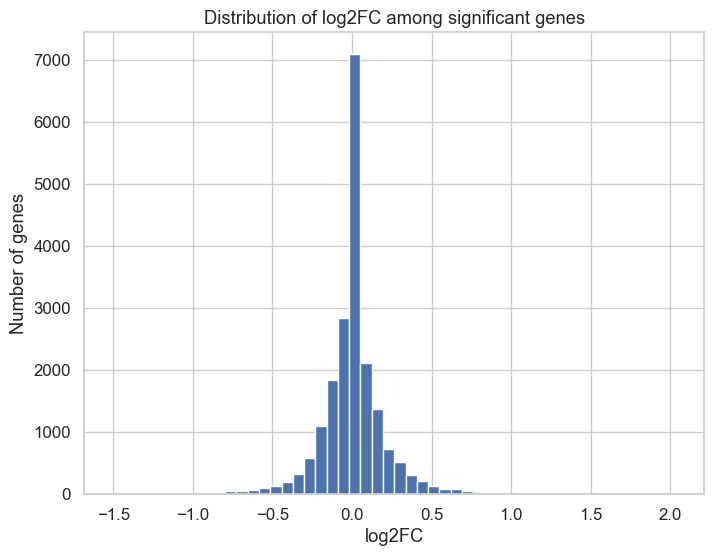

count    20169.000000
mean         0.005538
std          0.206019
min         -1.504098
25%         -0.072660
50%          0.000000
75%          0.072817
max          2.034992
Name: log2FC, dtype: float64


In [12]:
import matplotlib.pyplot as plt

# Filter genes significant by FDR
sig_genes = res

# Histogram of log2FC
plt.hist(sig_genes['log2FC'], bins=50)
plt.xlabel('log2FC')
plt.ylabel('Number of genes')
plt.title('Distribution of log2FC among significant genes')
plt.show()

# Summary stats
print(sig_genes['log2FC'].describe())


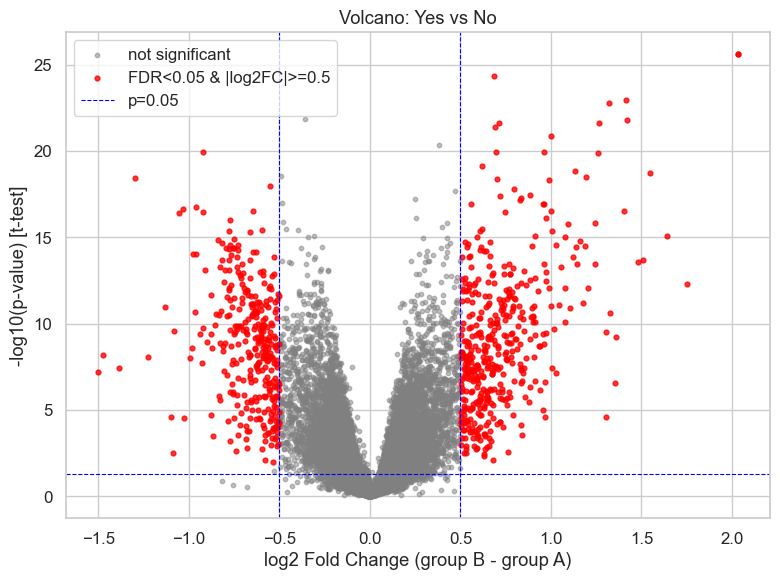

Volcano plot saved to C:\Users\pable\OneDrive\Escritorio\UPF\results\volcano_No_vs_Yes.png


In [13]:
# Prepare plotting columns
plot_df = res.copy()
plot_df['neglog10_p'] = -np.log10(plot_df['p_ttest'].replace(0, np.nextafter(0, 1)))
plot_df['significant'] = (plot_df['p_ttest_fdr'] < 0.05) & (plot_df['log2FC'].abs() >= 0.5)

# Basic volcano plot
fig, ax = plt.subplots(figsize=(8, 6))
# non-significant
ax.scatter(plot_df.loc[~plot_df['significant'], 'log2FC'], plot_df.loc[~plot_df['significant'], 'neglog10_p'],
           color='grey', alpha=0.5, s=10, label='not significant')
# significant
ax.scatter(plot_df.loc[plot_df['significant'], 'log2FC'], plot_df.loc[plot_df['significant'], 'neglog10_p'],
           color='red', alpha=0.8, s=12, label='FDR<0.05 & |log2FC|>=0.5')

ax.axhline(-np.log10(0.05), color='blue', linestyle='--', linewidth=0.8, label='p=0.05')
ax.axvline(0.5, color='blue', linestyle='--', linewidth=0.8)
ax.axvline(-0.5, color='blue', linestyle='--', linewidth=0.8)

ax.set_xlabel('log2 Fold Change (group B - group A)')
ax.set_ylabel('-log10(p-value) [t-test]')
ax.set_title(f'Volcano: {group_b} vs {group_a}')
ax.legend(frameon=True)
plt.tight_layout()
plt.show()

# Optionally save the figure
fig_path = out_dir / f'volcano_{group_a}_vs_{group_b}.png'
fig.savefig(fig_path, dpi=150)
print('Volcano plot saved to', fig_path)

Number of genes for enrichment: 438


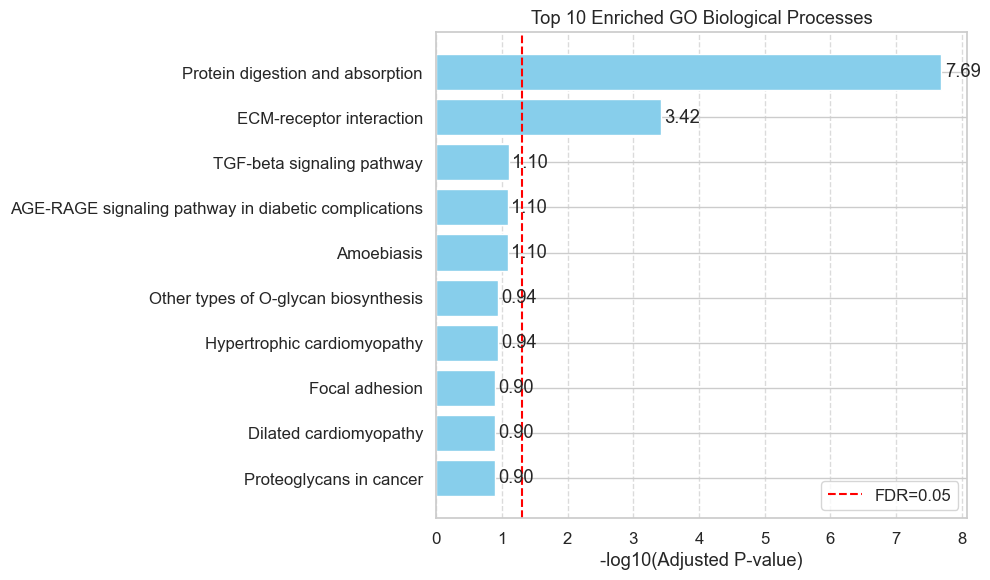

In [14]:
import pandas as pd
import gseapy as gp

# Load differential expression data
df = pd.read_csv("data/diffexpr_No_vs_Yes.txt", sep="\t")

# Filter for FDR < 0.05 and log2FC > 1
filtered_genes = df[(df['p_ttest_fdr'] < 0.05) & (df['log2FC'] > 0.5)]

# Make sure we have 55 genes
top_genes = filtered_genes
gene_list = top_genes['gene'].tolist()

print(f"Number of genes for enrichment: {len(gene_list)}")

# Run GO enrichment using gseapy (without 'description')
enr = gp.enrichr(
    gene_list=gene_list,
    gene_sets=['KEGG_2021_Human'],  # Other GO sets are also possible
    organism='Human',
    outdir=None  # Set a folder path to save results, None keeps it in memory
)

import matplotlib.pyplot as plt
import numpy as np

# Take the top 10 GO terms sorted by adjusted p-value
top_terms = enr.results.sort_values('Adjusted P-value').head(10)

# Reverse order for horizontal bar plot (most significant on top)
top_terms = top_terms[::-1]

# Prepare data
terms = top_terms['Term']
pvals = -np.log10(top_terms['Adjusted P-value'])

# Plot
plt.figure(figsize=(10,6))  # wider figure to accommodate long names
bars = plt.barh(terms, pvals, color='skyblue')
plt.xlabel('-log10(Adjusted P-value)')
plt.title('Top 10 Enriched GO Biological Processes')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add a vertical line for FDR = 0.05 cutoff
plt.axvline(x=-np.log10(0.05), color='red', linestyle='--', label='FDR=0.05')
plt.legend()

# Optional: add numeric labels at the end of each bar
for bar, val in zip(bars, pvals):
    plt.text(val + 0.05, bar.get_y() + bar.get_height()/2,
             f'{val:.2f}', va='center')

plt.tight_layout()

# Save the plot in the current directory
plt.savefig("top10_KEGG_enrichment.png", dpi=300)

# Show the plot
plt.show()





